In [179]:
import numpy as np
import pandas as pd

In [180]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [181]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2739,ham,Are you this much buzy,NaN,NaN,NaN
1905,ham,"There're some people by mu, I'm at the table b...",NaN,NaN,NaN
2877,spam,Hey Boys. Want hot XXX pics sent direct 2 ur p...,NaN,NaN,NaN
2662,spam,Hello darling how are you today? I would love ...,NaN,NaN,NaN
1435,ham,Dad went out oredi...,NaN,NaN,NaN


In [182]:
df.shape

(5572, 5)

## 1. Clean data

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [184]:
# xóa 3 cột cuối cùng
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [185]:
df.sample(5)

,v1,v2
2555,spam,FreeMSG You have been awarded a FREE mini DIGI...
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th..."
3472,ham,You getting back any time soon?
5182,ham,I sent them. Do you like?
3032,ham,"Aight, lemme know what's up"


In [186]:
# đổi tên cột
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1570,ham,No:-)i got rumour that you going to buy apartm...
2106,ham,Thank you. I like you as well...
5046,ham,Hmmm.still we dont have opener?
4789,ham,Yup. Izzit still raining heavily cos i'm in e ...
385,ham,It took Mr owl 3 licks


In [187]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [188]:
df['target'] = encoder.fit_transform(df['target'])

In [189]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [190]:
# kiểm tra values
df.isnull().sum()

target    0
text      0
dtype: int64

In [191]:
# kiểm tra duplicate values
df.duplicated().sum()

403

In [192]:
# xóa duplicate values
df = df.drop_duplicates(keep='first')

In [193]:
df.duplicated().sum()

0

In [194]:
df.shape

(5169, 2)

## 2. EDA

In [195]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

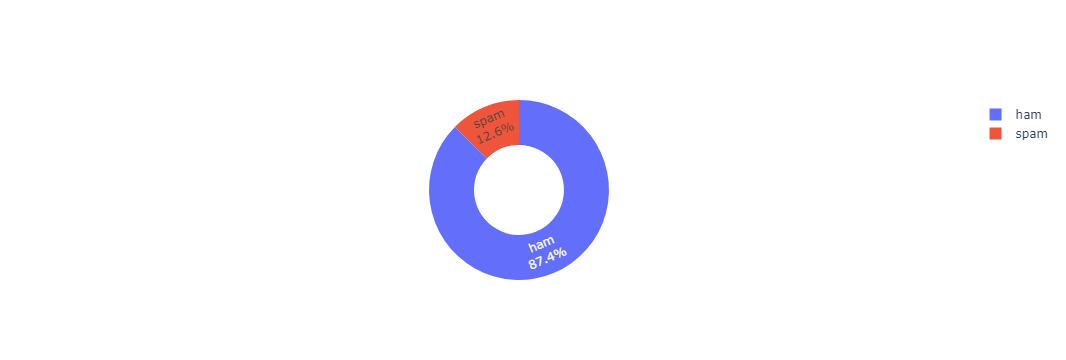

In [197]:
import plotly.graph_objects as go
labels = ['ham','spam']
values = df['target'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', hole=0.5)])
fig.show()

In [198]:
import nltk
print(nltk.__version__)
nltk.download('punkt')
nltk.download('stopwords')

3.8.1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [199]:
df['num_characters'] = df['text'].apply(len)

In [200]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [201]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [202]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [203]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [204]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [205]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [206]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [207]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [208]:
# thống kê các giá trị: số giá trị khác null, giá trị trung bình, độ lệch chuẩn,...
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [209]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [210]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


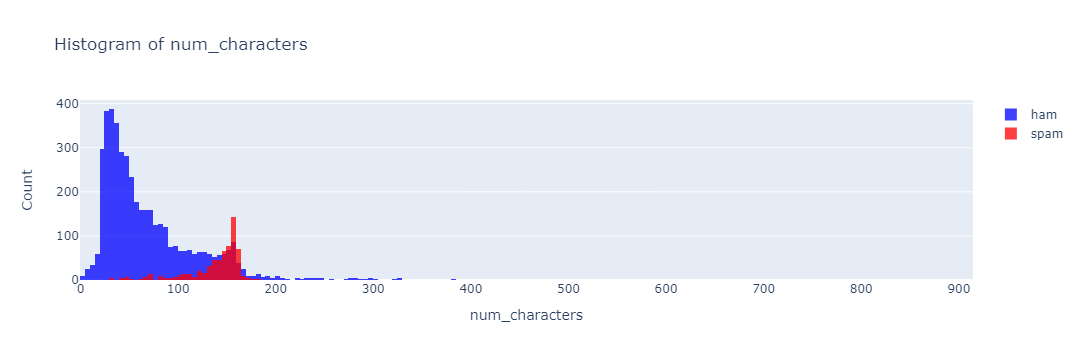

In [211]:
import plotly.graph_objects as go
# Create traces
trace0 = go.Histogram(
    x=df[df['target'] == 0]['num_characters'],
    opacity=0.75,
    name='ham',
    marker=dict(color='blue')
)
trace1 = go.Histogram(
    x=df[df['target'] == 1]['num_characters'],
    opacity=0.75,
    name='spam',
    marker=dict(color='red')
)
data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title_text='Histogram of num_characters', xaxis=dict(title='num_characters'), yaxis=dict( title='Count'),)
fig = go.Figure(data=data, layout=layout)
fig.show()

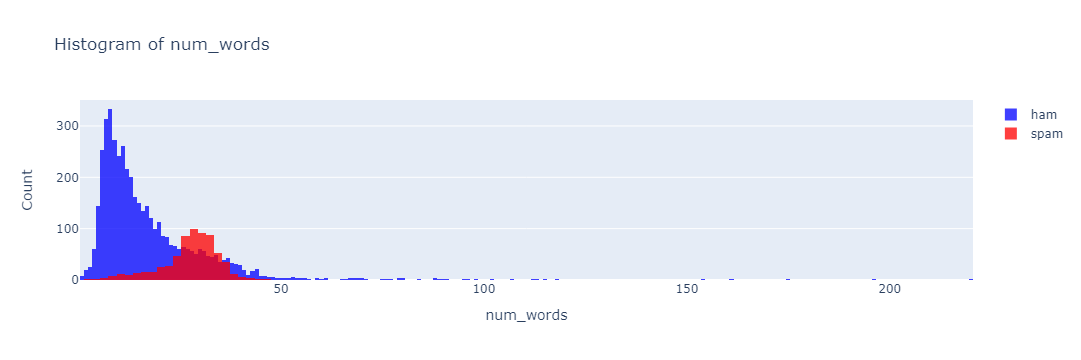

In [212]:
# Create traces
trace0 = go.Histogram(
    x=df[df['target'] == 0]['num_words'],
    opacity=0.75,
    name='ham',
    marker=dict(color='blue')
)
trace1 = go.Histogram(
    x=df[df['target'] == 1]['num_words'],
    opacity=0.75,
    name='spam',
    marker=dict(color='red')
)
data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title_text='Histogram of num_words', xaxis=dict(title='num_words'), yaxis=dict( title='Count'),)
fig = go.Figure(data=data, layout=layout)
fig.show()

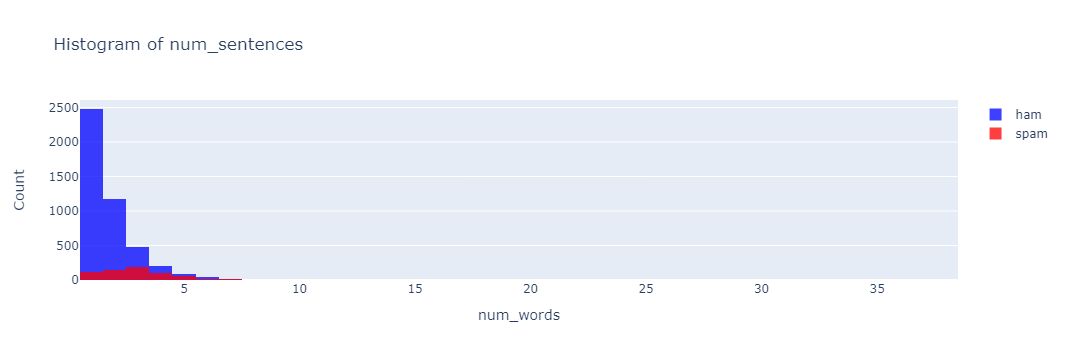

In [213]:
# Create traces
trace0 = go.Histogram(
    x=df[df['target'] == 0]['num_sentences'],
    opacity=0.75,
    name='ham',
    marker=dict(color='blue')
)
trace1 = go.Histogram(
    x=df[df['target'] == 1]['num_sentences'],
    opacity=0.75,
    name='spam',
    marker=dict(color='red')
)
data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title_text='Histogram of num_sentences', xaxis=dict(title='num_words'), yaxis=dict( title='Count'),)
fig = go.Figure(data=data, layout=layout)
fig.show()

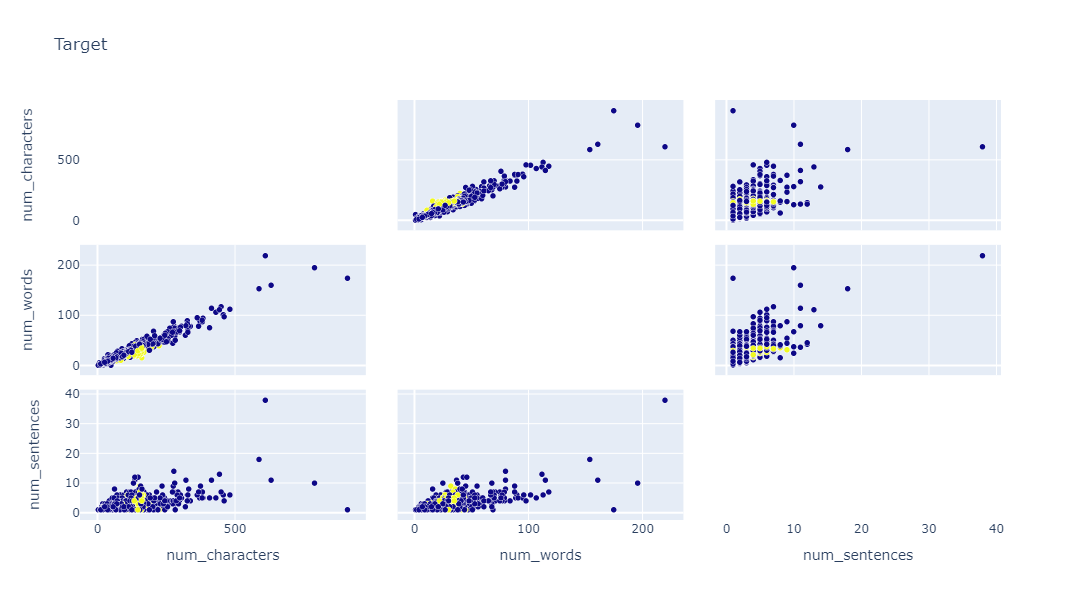

In [214]:
import plotly.graph_objects as go

index_vals = df['target']

fig = go.Figure(data=go.Splom(
    dimensions=[
        dict(label='num_characters', values=df['num_characters']),
        dict(label='num_words', values=df['num_words']),
        dict(label='num_sentences', values=df['num_sentences'])
    ],
    diagonal=dict(visible=False),  # Removed extra closing parenthesis
    text=df['target'],
    marker=dict(
        color=index_vals,
        showscale=False,  # colors encode categorical variables
        line_color='white',
        line_width=0.5
    )
))

fig.update_layout(
    title='Target',
    width=600,
    height=600
)

fig.show()

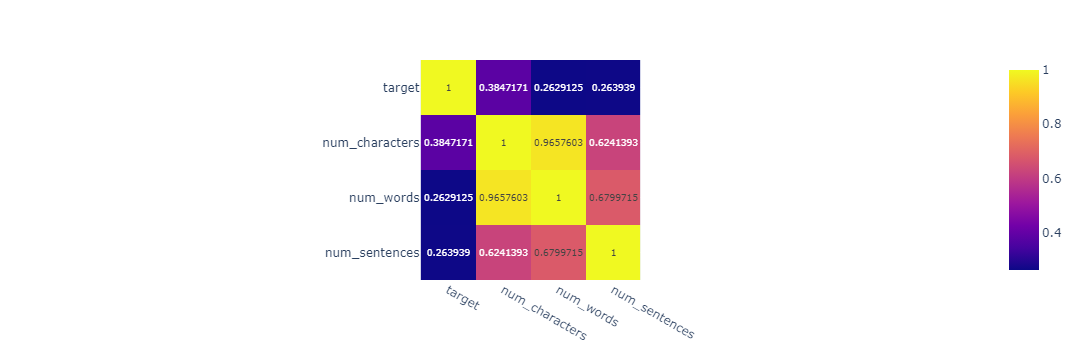

In [215]:
import plotly.express as px
fig = px.imshow(df.drop(columns=['text']).corr(), text_auto=True)
fig.show()

## 3. Data Preprocessing

- Lower case (chuyển thành chữ thường)
- Tokenization (Token hóa)
- Removing special characters (Loại bỏ các ký tự đặc biệt)
- Removing stop words and punctuation (Xóa các từ dừng và dấu câu)
- Stemming (cắt giảm)

In [216]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [217]:
def transform_text(text): 
    text = text.lower() # chuyển thành chữ thường
    text = nltk.word_tokenize(text) # chia text thành mảng các từ riêng lẻ
    
    y = []
    for i in text:
        if i.isalnum(): # kiểm tra từ chỉ bao gồm chữ và số
            y.append(i)
    
    text = y[:] # copy y to text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # kiểm tra xem từ không phải là từ dừng và dấu câu
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i)) # cắt giảm từ trở về dạng gốc
            
    return " ".join(y)

In [218]:
transform_text('Whoever has money, please donate to me')

'whoever money pleas donat'

In [219]:
df['transformed_text'] = df['text'].apply(transform_text)

In [220]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [221]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [222]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

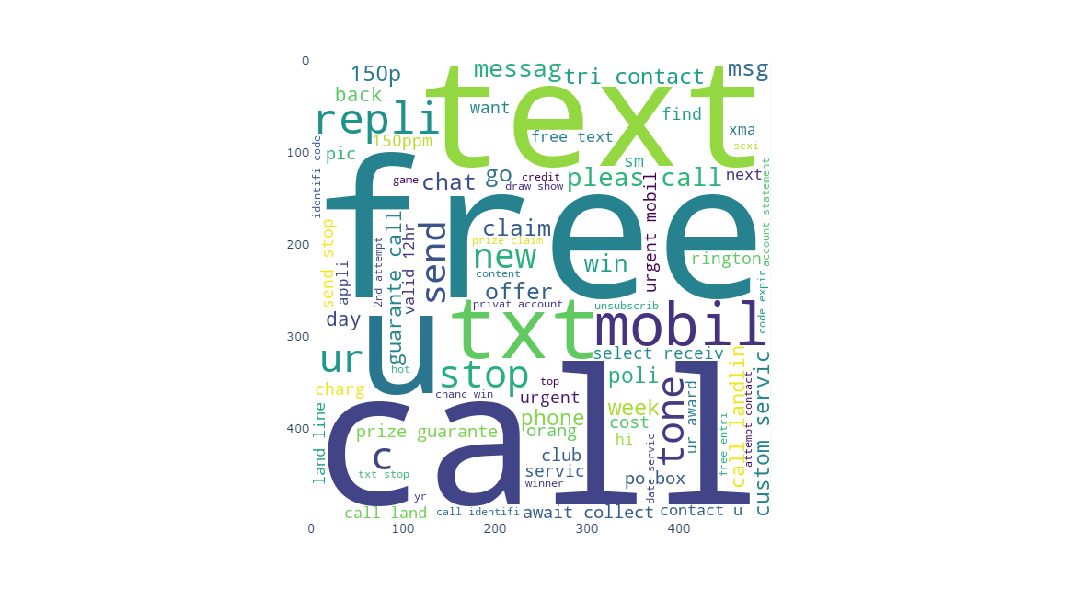

In [223]:
fig = px.imshow(spam_wc)
fig.update_layout(
    width=800,  # Desired width in pixels
    height=600  # Desired height in pixels
)
fig.show()

In [224]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

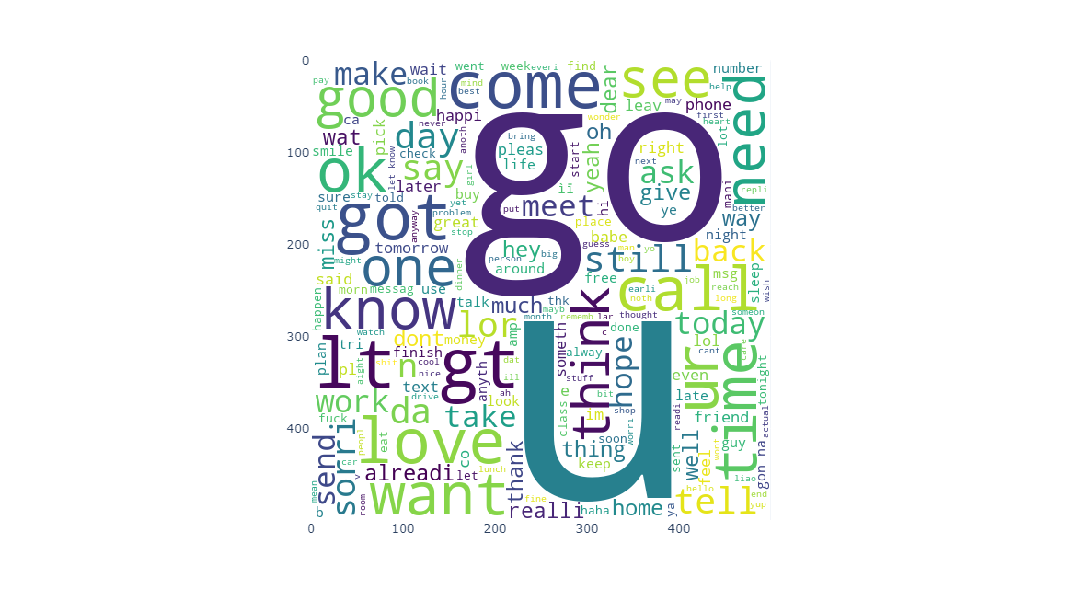

In [225]:
fig = px.imshow(ham_wc)
fig.update_layout(
    width=800,  # Desired width in pixels
    height=600  # Desired height in pixels
)
fig.show()

In [226]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [227]:
len(spam_corpus)

9939

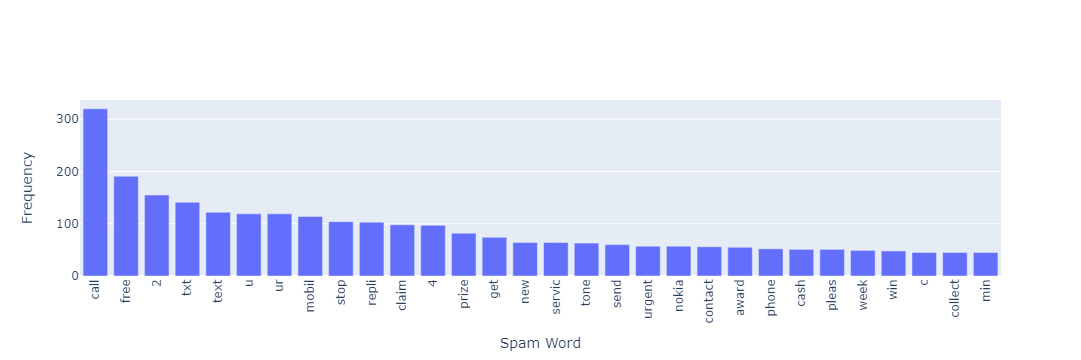

In [228]:
from collections import Counter
word_freq = Counter(spam_corpus).most_common(30) # 30 từ xuất hiện nhiều nhất
df_word_freq = pd.DataFrame(word_freq, columns=['Spam Word', 'Frequency'])
fig = go.Figure(data=go.Bar(
    x=df_word_freq['Spam Word'],
    y=df_word_freq['Frequency']
))
fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_title="Spam Word",
    yaxis_title="Frequency"
)
fig.show()

In [229]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [230]:
len(ham_corpus)

35404

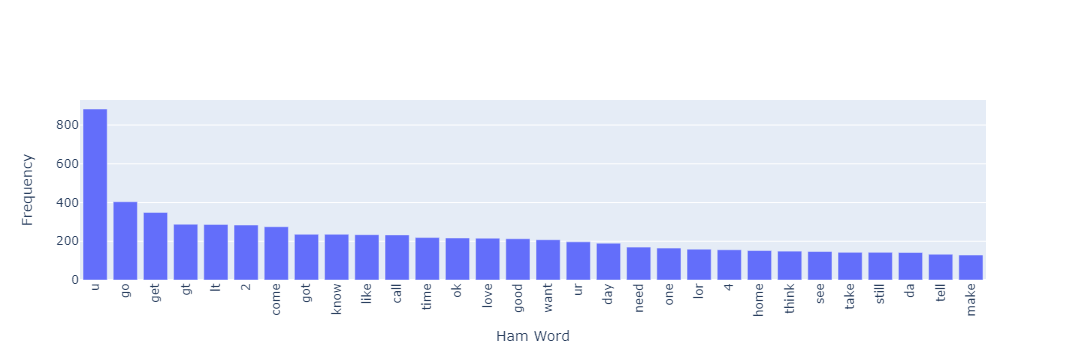

In [231]:
word_freq = Counter(ham_corpus).most_common(30)
df_word_freq = pd.DataFrame(word_freq, columns=['Ham Word', 'Frequency'])
fig = go.Figure(data=go.Bar(
    x=df_word_freq['Ham Word'],
    y=df_word_freq['Frequency']
))
fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_title="Ham Word",
    yaxis_title="Frequency"
)
fig.show()

## 4.Model Building

In [232]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()   #Vector hóa văn bản
tfidf = TfidfVectorizer(max_features = 3000) # chuyển đổi văn bản thành vectơ TF-IDF giữ lại 3000 đặc trưng

In [233]:
X = tfidf.fit_transform(df['transformed_text']).toarray() # chuyển đổi cột 'transformed_text' thành ma trận các vectơ TF-IDF
X.shape

(5169, 3000)

In [234]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X) # chuẩn hóa ma trận về khoảng giá trị [0, 1]
X.shape

(5169, 3000)

In [235]:
y = df['target'].values

### 4.1 Train, test datasets

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### 4.2 Naive Bayes

In [238]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [239]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_gnb))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_gnb))
print("precision score:", precision_score(y_test, y_pred_gnb))
print("\n",classification_report(y_test, y_pred_gnb))

accuracy score: 0.8723404255319149
confusion matrix:
 [[782 114]
 [ 18 120]]
precision score: 0.5128205128205128

               precision    recall  f1-score   support

           0       0.98      0.87      0.92       896
           1       0.51      0.87      0.65       138

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.92      0.87      0.89      1034



In [240]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_mnb))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_mnb))
print("precision score:", precision_score(y_test, y_pred_mnb))
print("\n",classification_report(y_test, y_pred_mnb))

accuracy score: 0.9787234042553191
confusion matrix:
 [[889   7]
 [ 15 123]]
precision score: 0.9461538461538461

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.89      0.92       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [241]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_bnb))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_bnb))
print("precision score:", precision_score(y_test, y_pred_bnb))
print("\n",classification_report(y_test, y_pred_bnb))

accuracy score: 0.9835589941972921
confusion matrix:
 [[895   1]
 [ 16 122]]
precision score: 0.991869918699187

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



### 4.3 Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
lg_model = LogisticRegression(max_iter=200)
lg_model.fit(X_train, y_train)
y_pred_lg = lg_model.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_lg))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_lg))
print("precision score:", precision_score(y_test, y_pred_lg))
print("\n",classification_report(y_test, y_pred_lg))

accuracy score: 0.9748549323017408
confusion matrix:
 [[894   2]
 [ 24 114]]
precision score: 0.9827586206896551

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



### 4.4 K Neighbors

In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_knn))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_knn))
print("precision score:", precision_score(y_test, y_pred_knn))
print("\n",classification_report(y_test, y_pred_knn))

accuracy score: 0.9052224371373307
confusion matrix:
 [[895   1]
 [ 97  41]]
precision score: 0.9761904761904762

               precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       0.98      0.30      0.46       138

    accuracy                           0.91      1034
   macro avg       0.94      0.65      0.70      1034
weighted avg       0.91      0.91      0.88      1034



### 4.5 Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [247]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_dtc))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_dtc))
print("precision score:", precision_score(y_test, y_pred_dtc))
print("\n",classification_report(y_test, y_pred_dtc))

accuracy score: 0.9303675048355899
confusion matrix:
 [[880  16]
 [ 56  82]]
precision score: 0.8367346938775511

               precision    recall  f1-score   support

           0       0.94      0.98      0.96       896
           1       0.84      0.59      0.69       138

    accuracy                           0.93      1034
   macro avg       0.89      0.79      0.83      1034
weighted avg       0.93      0.93      0.93      1034



### 4.6 Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_rfc))
print("precision score:", precision_score(y_test, y_pred_rfc))
print("\n",classification_report(y_test, y_pred_rfc))

accuracy score: 0.9758220502901354
confusion matrix:
 [[894   2]
 [ 23 115]]
precision score: 0.9829059829059829

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.97      1034



### 4.7 SVM

In [250]:
from sklearn.svm import SVC

In [251]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_svc))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_svc))
print("precision score:", precision_score(y_test, y_pred_svc, zero_division=1))
print("\n",classification_report(y_test, y_pred_svc, zero_division=1))

accuracy score: 0.97678916827853
confusion matrix:
 [[894   2]
 [ 22 116]]
precision score: 0.9830508474576272

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.84      0.91       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### 4.8 Neural network

In [252]:
from sklearn.neural_network import MLPClassifier

In [253]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=1, max_iter=700)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_nn))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_nn))
print("precision score:", precision_score(y_test, y_pred_nn, zero_division=1))
print("\n",classification_report(y_test, y_pred_nn, zero_division=1))

accuracy score: 0.9787234042553191
confusion matrix:
 [[890   6]
 [ 16 122]]
precision score: 0.953125

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.88      0.92       138

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



## 5. Evaluate algorithms

In [254]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

In [255]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gpc = GaussianProcessClassifier()

In [256]:
clfs = {
    'Gaussian Naive Bayes': gnb,
    'Multinomial Naive Bayes': mnb,
    'Bernoulli Naive Bayes': bnb,
    'Logistic Regression': lg_model,
    'K Neighbors': knn,
    'Decision Tree': dtc,
    'Random Forest': rfc,
    'SVM': svc,
    'Neural network': nn,
    'Ada Boost': abc,
    'Bagging': bc,
    'Extra Trees': etc,
    'Gradient Boosting': gbdt,
    'Gaussian Process': gpc
}

In [257]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [258]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Gaussian Naive Bayes
Accuracy -  0.8723404255319149
Precision -  0.5128205128205128
For  Multinomial Naive Bayes
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  Bernoulli Naive Bayes
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  Logistic Regression
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  K Neighbors
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  Decision Tree
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  Random Forest
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  SVM
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  Neural network
Accuracy -  0.9787234042553191
Precision -  0.953125
For  Ada Boost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  Bagging
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  Extra Trees
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  Gradient Boosting

In [259]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [260]:
performance_df

,Algorithm,Accuracy,Precision
13,Gaussian Process,0.904255,1.000000
2,Bernoulli Naive Bayes,0.983559,0.991870
7,SVM,0.976789,0.983051
6,Random Forest,0.975822,0.982906
3,Logistic Regression,0.974855,0.982759
4,K Neighbors,0.905222,0.976190
11,Extra Trees,0.974855,0.974576
8,Neural network,0.978723,0.953125
1,Multinomial Naive Bayes,0.978723,0.946154
9,Ada Boost,0.960348,0.929204


In [261]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [262]:
performance_df1

,Algorithm,variable,value
0,Gaussian Process,Accuracy,0.904255
1,Bernoulli Naive Bayes,Accuracy,0.983559
2,SVM,Accuracy,0.976789
3,Random Forest,Accuracy,0.975822
4,Logistic Regression,Accuracy,0.974855
5,K Neighbors,Accuracy,0.905222
6,Extra Trees,Accuracy,0.974855
7,Neural network,Accuracy,0.978723
8,Multinomial Naive Bayes,Accuracy,0.978723
9,Ada Boost,Accuracy,0.960348


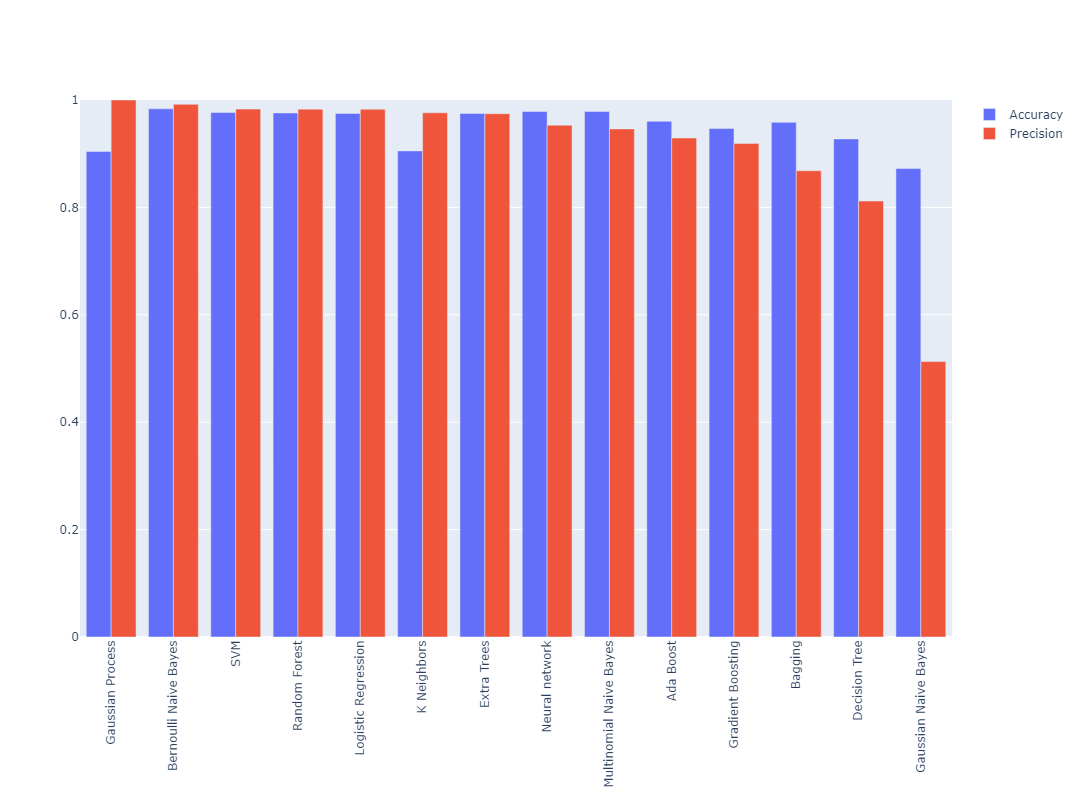

In [263]:
import plotly.graph_objects as go

# Create a bar for each 'variable'
bars = []
for variable in performance_df1['variable'].unique():
    bars.append(go.Bar(
        name=variable,
        x=performance_df1[performance_df1['variable'] == variable]['Algorithm'],
        y=performance_df1[performance_df1['variable'] == variable]['value']
    ))
fig = go.Figure(data=bars)
fig.update_layout(
    xaxis_tickangle=-90,
    yaxis_range=[0, 1.0],
    barmode='group',  # bars are grouped side-by-side
    width=800,
    height=800
)

fig.show()